#### This is a script to simulate equipment enhancement in the online game Elsword.
#### I have used <a href=https://elwiki.net/w/Upgrading_Equipment>Elwiki</a> for reference.

In [1]:
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

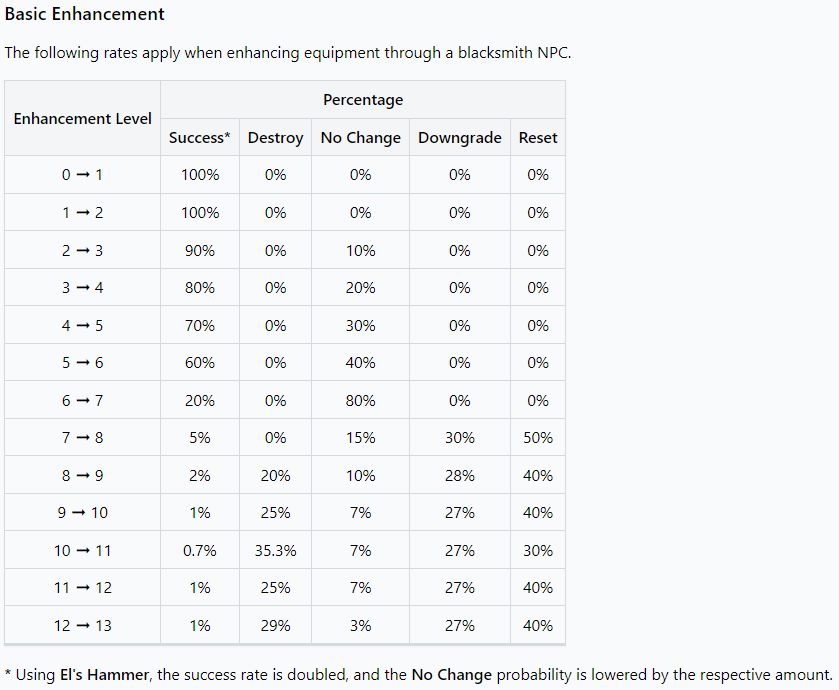

In [2]:
class Equipment:
    
    # Initializes the attributes
    def __init__(self):#, level, stones, fluorites, crystals, destructions, downgrades, resets, hammers):
        self.level = 0
        self.stones = 0
        self.fluorites = 0
        self.crystals = 0
        self.destructions = 0
        self.downgrades = 0
        self.resets = 0
        self.hammers = 0
    
    # Attempts an enhancement
    def enhance(self, use_hammer=False, use_protection=False, hammer_12_only=False, verbose=True):

        # Interrupts the method if level is already 13
        if self.level == 13:
            print('Already at max level!')
            return None

        # Dictionary with the chances of enhancing when trying to reach each level. The lists are in the format: [success, destruction, no change, downgrade, reset]
        chances = {1:[1, 0, 0, 0, 0],
                   2:[1, 0, 0, 0, 0],
                   3:[0.9, 0, 0.1, 0, 0],
                   4:[0.8, 0, 0.2, 0, 0],
                   5:[0.7, 0, 0.3, 0, 0],
                   6:[0.6, 0, 0.4, 0, 0],
                   7:[0.2, 0, 0.8, 0, 0],
                   8:[0.05, 0, 0.15, 0.3, 0.5],
                   9:[0.02, 0.2, 0.1, 0.28, 0.4],
                   10:[0.01, 0.25, 0.07, 0.27, 0.4],
                   11:[0.007, 0.353, 0.07, 0.27, 0.3],
                   12:[0.01, 0.25, 0.07, 0.27, 0.4],
                   13:[0.01, 0.29, 0.03, 0.27, 0.4]
                   }

        # Consumes one enhancement stone, which is effectively the number of attempts
        self.stones += 1

        # Using El's Hammer, the success rate is doubled, and the 'no change' probability is lowered by the respective amount
        if use_hammer:
            if (hammer_12_only and self.level >= 11) or not hammer_12_only:
                for key in chances.keys():
                    chances[key][2] -= chances[key][0]
                    chances[key][0] *= 2
                
                # Consumes a hammer
                self.hammers += 1

        # Using fluorite stone or crystal, the chances of downgrade, destruction, 'no change' and reset are adjusted
        if use_protection:
            for key in chances.keys():
                # Fluorite stone (can prevent destruction, reset and downgrade)
                if key <= 11:
                    chances[key][2] += (chances[key][1] + chances[key][3] + chances[key][4]) # Now the 'no change' is the sum of the downgrade, reset, destruction and 'no change' rates
                    chances[key][1] = 0
                    chances[key][3] = 0
                    chances[key][4] = 0
                # Fluorite crystal (can prevent destruction and reset, cannot prevent downgrade)
                else:
                    chances[key][2] += (chances[key][1] + chances[key][4]) # Now the 'no change' is the sum of the reset, destruction and 'no change' rates
                    chances[key][1] = 0
                    chances[key][4] = 0
            
            # Consumes a fluorite stone or crystal if level is 7 or more
            if self.level <= 10 and self.level >= 7:
                self.fluorites += 1
            elif self.level >= 11:
                self.crystals += 1

        # Generates a random number between 0 and 1
        rng = random.uniform(0, 1)
        if verbose:
            print(f'Success rate: {round(100 * chances[self.level + 1][0], 2)}%')
        
        # Success
        if rng <= chances[self.level + 1][0]:
            self.level += 1
            if verbose:
                print(f'SUCCESS! Current level: {self.level}')
            return None
        # Destruction
        elif rng <= chances[self.level + 1][0] + chances[self.level + 1][1]:
            self.destructions += 1
            if verbose:
                print(f'DESTRUCTION! A Blessed Restoration Scroll was used. Current level: {self.level}')
            return None
        # No change
        elif rng <= chances[self.level + 1][0] + chances[self.level + 1][1] + chances[self.level + 1][2]:
            if verbose:
                print(f'NO CHANGE. Current level: {self.level}')
            return None
        # Downgrade
        elif rng <= chances[self.level + 1][0] + chances[self.level + 1][1] + chances[self.level + 1][2] + chances[self.level + 1][3]:  # Decrease
            self.level -= 1
            self.downgrades += 1
            if verbose:
                print(f'DOWNGRADE! Current level: {self.level}')
            return None
        # Reset
        else:
            self.level = 0
            self.resets += 1
            if verbose:
                print(f'RESET! Back to level 0')
            return None

In [3]:
equipment = Equipment()
equipment.level = 10

while equipment.level < 12:
    equipment.enhance(use_protection=True, use_hammer=True, hammer_12_only=True, verbose=False)
vars(equipment)

{'level': 12,
 'stones': 1553,
 'fluorites': 1532,
 'crystals': 21,
 'destructions': 0,
 'downgrades': 6,
 'resets': 0,
 'hammers': 21}

100%|██████████| 2000/2000 [00:35<00:00, 55.96it/s]


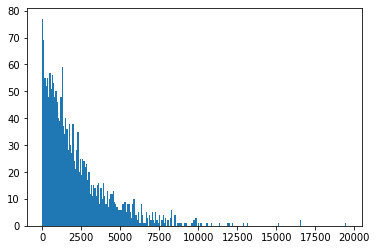

In [4]:
# Simulates enhancement in a loop
sim = 2000
fluorites = []
crystals = []
downgrades = []
bins = sim // 8

for i in tqdm(range(sim)):
    equipment = Equipment()
    equipment.level = 10
    while equipment.level < 12:
        equipment.enhance(use_protection=True, use_hammer=True, hammer_12_only=True, verbose=False)
    fluorites.append(equipment.fluorites)
    crystals.append(equipment.crystals)
    downgrades.append(equipment.downgrades)

plt.hist(fluorites, bins=bins)
plt.show()

In [5]:
print(sum(fluorites) / len(fluorites))
print(sum(crystals) / len(crystals))
print(sum(downgrades) / len(downgrades))

2190.2575
52.6625
14.1785
